In [1]:
# import library

import pandas as pd

In [2]:
# load dataset

dataset=pd.read_csv("CSUSHPISA.csv")
dataset

,DATE,CSUSHPISA
0,1987-01-01,63.965
1,1987-02-01,64.424
2,1987-03-01,64.736
3,1987-04-01,65.132
4,1987-05-01,65.563
...,...,...
435,2023-04-01,300.198
436,2023-05-01,302.620
437,2023-06-01,304.651
438,2023-07-01,306.634


# Standardization/ Normalizaton
# MinMax Scaler

In [3]:
# Time Series - Univariate

column="CSUSHPISA"

In [4]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(dataset[[column]])
print("Len:",data1.shape)

Len: (440, 1)


In [5]:
len(data1)

440

# Split Training and Testing data using series of data

In [6]:
# x_train, x_test  - input training and testing data
# y_train, y_test  - output training and testing data

training_size = round(len(data1 ) * 0.80)  # Total -440
print(training_size)

X_train=data1[:training_size]              # first 0:352
X_test=data1[training_size:]               # 88: last
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)

y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

352
X_train length: (352, 1)
X_test length: (88, 1)
y_train length: (352, 1)
y_test length: (88, 1)


# Model Creation

In [7]:
# ! pip install stockFunctions

ERROR: Could not find a version that satisfies the requirement stockFunctions (from versions: none)
ERROR: No matching distribution found for stockFunctions


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
# AutoRegressive Moving Average

orders=[(1,0,2),(1,0,1),(2,0,1),(1,0,1)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.arima.model import ARIMA
    model = ARIMA(X_train, order=i)
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(len(X_train), len(data1)-1)
    #print(y_pred)    
    
    from sklearn import metrics
      
    # rmse - root mean squared error
    print("rmse :", metrics.mean_squared_error(y_test,y_pred))
    # mape - mean absolute percentage error
    print("mape :", metrics.mean_absolute_percentage_error(y_test,y_pred))
        
        
    print("************")

F:\Anaconda\envs\aiml\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


rmse : 0.1995387670704987
mape : 0.49295469875208264
************
rmse : 0.0790827039019348
mape : 0.27779448268742707
************


F:\Anaconda\envs\aiml\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


rmse : 0.09324429578244704
mape : 0.28549720520785926
************
rmse : 0.0790827039019348
mape : 0.27779448268742707
************


In [18]:
len(y_pred)

88

# Graph

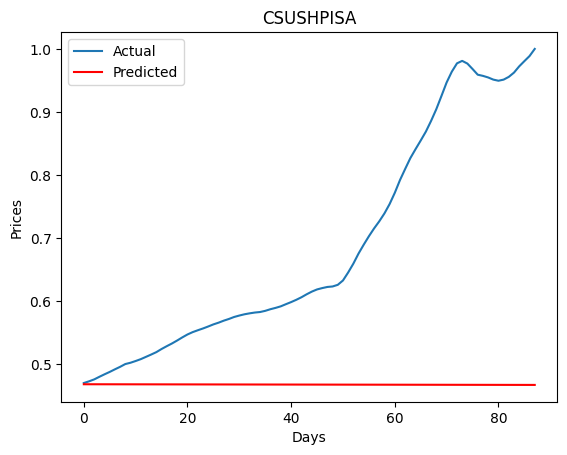

In [20]:
import matplotlib.pyplot as plt

# plt.plot("Actual ",y_test)
# plt.plot("Predicted ", y_pred,colors='red')
plt.title("CSUSHPISA")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.plot(y_test, label='Actual')
plt.plot(y_pred,color='red', label='Predicted')
plt.legend()
plt.show()

In [22]:
len(data1)

440

In [23]:
# Actual values

y_test

array([[0.47043868],
       [0.47310737],
       [0.47616312],
       [0.48030264],
       [0.48426697],
       [0.48804387],
       [0.49215487],
       [0.49609068],
       [0.50049096],
       [0.50256072],
       [0.50532719],
       [0.5083096 ],
       [0.5119439 ],
       [0.51559858],
       [0.51941623],
       [0.52435839],
       [0.52882386],
       [0.53308561],
       [0.53778332],
       [0.542754  ],
       [0.54738245],
       [0.55110231],
       [0.55409287],
       [0.55692046],
       [0.56004954],
       [0.56336605],
       [0.56609585],
       [0.56927791],
       [0.57198734],
       [0.57511235],
       [0.5773899 ],
       [0.57938632],
       [0.58089383],
       [0.5821528 ],
       [0.58296359],
       [0.58483371],
       [0.58740868],
       [0.58953141],
       [0.59198823],
       [0.59541067],
       [0.59871496],
       [0.60236148],
       [0.60642359],
       [0.61110907],
       [0.61534231],
       [0.61877697],
       [0.62092821],
       [0.622

In [24]:
# actual values -  y_test
# Convert minmax scaler into inverse_transform 

actual=Ms.inverse_transform(y_test)

In [25]:
# Predcted values

y_pred

array([0.46848629, 0.46847399, 0.46846168, 0.46844938, 0.46843708,
       0.46842478, 0.46841249, 0.46840019, 0.46838789, 0.4683756 ,
       0.4683633 , 0.46835101, 0.46833871, 0.46832642, 0.46831413,
       0.46830184, 0.46828955, 0.46827726, 0.46826497, 0.46825269,
       0.4682404 , 0.46822811, 0.46821583, 0.46820355, 0.46819126,
       0.46817898, 0.4681667 , 0.46815442, 0.46814214, 0.46812987,
       0.46811759, 0.46810531, 0.46809304, 0.46808076, 0.46806849,
       0.46805622, 0.46804394, 0.46803167, 0.4680194 , 0.46800713,
       0.46799487, 0.4679826 , 0.46797033, 0.46795807, 0.4679458 ,
       0.46793354, 0.46792127, 0.46790901, 0.46789675, 0.46788449,
       0.46787223, 0.46785997, 0.46784772, 0.46783546, 0.4678232 ,
       0.46781095, 0.46779869, 0.46778644, 0.46777419, 0.46776194,
       0.46774969, 0.46773744, 0.46772519, 0.46771294, 0.46770069,
       0.46768845, 0.4676762 , 0.46766396, 0.46765171, 0.46763947,
       0.46762723, 0.46761499, 0.46760275, 0.46759051, 0.46757

In [26]:
# Reshape y_pred values

y_pred_reshape=y_pred.reshape(-1,1)
y_pred_reshape

array([[0.46848629],
       [0.46847399],
       [0.46846168],
       [0.46844938],
       [0.46843708],
       [0.46842478],
       [0.46841249],
       [0.46840019],
       [0.46838789],
       [0.4683756 ],
       [0.4683633 ],
       [0.46835101],
       [0.46833871],
       [0.46832642],
       [0.46831413],
       [0.46830184],
       [0.46828955],
       [0.46827726],
       [0.46826497],
       [0.46825269],
       [0.4682404 ],
       [0.46822811],
       [0.46821583],
       [0.46820355],
       [0.46819126],
       [0.46817898],
       [0.4681667 ],
       [0.46815442],
       [0.46814214],
       [0.46812987],
       [0.46811759],
       [0.46810531],
       [0.46809304],
       [0.46808076],
       [0.46806849],
       [0.46805622],
       [0.46804394],
       [0.46803167],
       [0.4680194 ],
       [0.46800713],
       [0.46799487],
       [0.4679826 ],
       [0.46797033],
       [0.46795807],
       [0.4679458 ],
       [0.46793354],
       [0.46792127],
       [0.467

In [27]:
# predicted values -  y_pred
# Convert minmax scaler into inverse_transform 

predicted=Ms.inverse_transform(y_pred_reshape)
predicted

array([[178.94980635],
       [178.94678673],
       [178.94376734],
       [178.94074816],
       [178.9377292 ],
       [178.93471045],
       [178.93169193],
       [178.92867363],
       [178.92565554],
       [178.92263767],
       [178.91962002],
       [178.91660258],
       [178.91358537],
       [178.91056837],
       [178.90755159],
       [178.90453503],
       [178.90151869],
       [178.89850256],
       [178.89548666],
       [178.89247097],
       [178.8894555 ],
       [178.88644024],
       [178.88342521],
       [178.88041039],
       [178.87739579],
       [178.87438141],
       [178.87136724],
       [178.8683533 ],
       [178.86533957],
       [178.86232606],
       [178.85931277],
       [178.85629969],
       [178.85328684],
       [178.8502742 ],
       [178.84726178],
       [178.84424957],
       [178.84123759],
       [178.83822582],
       [178.83521427],
       [178.83220293],
       [178.82919182],
       [178.82618092],
       [178.82317024],
       [178

In [28]:
from UserDefinedFns import conversionSingle
actual=Ms.inverse_transform(y_test)
actual_price=conversionSingle(actual,[column])
actual_price

,CSUSHPISA
0,179.429
1,180.084
2,180.834
3,181.85
4,182.823
...,...
83,300.198
84,302.62
85,304.651
86,306.634


In [29]:
from UserDefinedFns import conversionSingle
predicted=Ms.inverse_transform(y_pred_reshape)
predicted_price=conversionSingle(predicted,[column])
predicted_price

,CSUSHPISA
0,178.949806
1,178.946787
2,178.943767
3,178.940748
4,178.937729
...,...
83,178.69992
84,178.696918
85,178.693917
86,178.690915


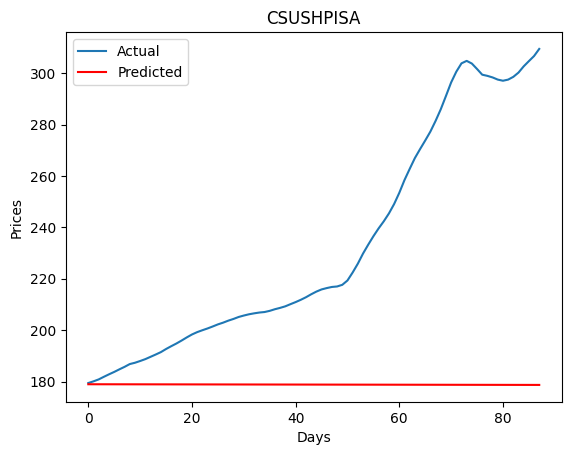

In [30]:
import matplotlib.pyplot as plt

plt.title("CSUSHPISA")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.plot(actual_price, label='Actual')
plt.plot(predicted_price,color='red', label='Predicted')
plt.legend()
plt.show()

# Evaluation Metrics

In [31]:
# Evaluation metrics for actual price and predicted price

# rmse - root mean squared error
print("rmse :", metrics.mean_squared_error(actual_price,predicted_price))
# mape - mean absolute percentage error
print("mape :", metrics.mean_absolute_percentage_error(actual_price,predicted_price))

rmse : 4763.966023047761
mape : 0.2070464106675195


# CSUSHPISA Forcasted for 5 days

In [32]:
# Time Series Analysis - Forcasting
# CSUSHPISA Forecast for 5 days 

forecast=model_fit.predict(len(data1), len(data1)+4)
forecast

array([0.46740703, 0.4673948 , 0.46738258, 0.46737036, 0.46735814])

In [33]:
from UserDefinedFns import conversionSingle

forecastTable=conversionSingle(forecast,["Predicted_CSUSHPISA"])
forecast_price=Ms.inverse_transform(forecastTable)
Predicted_forecast_price=conversionSingle(forecast_price,["Predicted_CSUSHPISA"])
Predicted_forecast_price

,Predicted_CSUSHPISA
0,178.684914
1,178.681913
2,178.678913
3,178.675913
4,178.672913


In [34]:
Predicted_forecast_price.to_csv("Predicted_CSUSHPISA.csv",index=False)